<a href="https://colab.research.google.com/github/integrationtoinfinity/A_Naive_folk/blob/main/G7_cointegration_and_GARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prerequisites**

In [2]:
!pip install yfinance


**Data** **Collection**

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define index tickers
tickers = ['^GSPC', '^FTSE', '^N225', '^GDAXI', '^FCHI', 'FTSEMIB.MI', '^GSPTSE']

# Fetch data
data = yf.download(tickers, start='2023-01-01', end='2024-11-30')['Adj Close']

# Display the first few rows
data.head()



[*********************100%***********************]  7 of 7 completed


Ticker,FTSEMIB.MI,^FCHI,^FTSE,^GDAXI,^GSPC,^GSPTSE,^N225
Date,,,,,,,
2023-01-02,24158.0,6594.569824,NaN,14069.259766,NaN,NaN,NaN
2023-01-03,24436.0,6623.890137,7554.100098,14181.669922,3824.139893,19443.800781,NaN
2023-01-04,24861.0,6776.430176,7585.200195,14490.780273,3852.969971,19588.800781,25716.859375
2023-01-05,24833.0,6761.500000,7633.500000,14436.309570,3808.100098,19506.800781,25820.800781
2023-01-06,25180.0,6860.950195,7699.500000,14610.019531,3895.080078,19814.500000,25973.849609


**Return Calculation**












In [4]:
# Compute daily returns
daily_returns = data.pct_change().dropna()

# Compute cumulative returns
#cumulative_returns = (1 + daily_returns).cumprod() - 1

# Display the first few rows of daily returns
daily_returns.head()


<ipython-input-4-f9cc9e9b27a9>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


Ticker,FTSEMIB.MI,^FCHI,^FTSE,^GDAXI,^GSPC,^GSPTSE,^N225
Date,,,,,,,
2023-01-05,-0.001126,-0.002203,0.006368,-0.003759,-0.011646,-0.004186,0.004042
2023-01-06,0.013973,0.014708,0.008646,0.012033,0.022841,0.015774,0.005927
2023-01-09,0.008141,0.006764,0.003299,0.012513,-0.000768,0.002150,0.000000
2023-01-10,-0.000788,-0.005533,-0.003935,-0.001232,0.006978,0.002105,0.007766
2023-01-11,0.007175,0.008014,0.003964,0.011730,0.012849,0.006342,0.010332


**Descriptive Statistics**







In [25]:
# Descriptive statistics
desc_stats = daily_returns.describe()
print(desc_stats)




Ticker  FTSEMIB.MI       ^FCHI       ^FTSE      ^GDAXI       ^GSPC  \
count   496.000000  496.000000  496.000000  496.000000  496.000000   
mean      0.000639    0.000167    0.000200    0.000642    0.000936   
std       0.009257    0.008337    0.006580    0.007800    0.007929   
min      -0.046080   -0.035827   -0.038313   -0.032664   -0.029969   
25%      -0.004387   -0.004564   -0.003275   -0.003299   -0.003041   
50%       0.001100    0.000464    0.000310    0.000725    0.000781   
75%       0.006812    0.005492    0.003815    0.005456    0.005727   
max       0.025459    0.023325    0.019546    0.021636    0.025296   

Ticker     ^GSPTSE       ^N225  
count   496.000000  496.000000  
mean      0.000566    0.000889  
std       0.006693    0.013421  
min      -0.022893   -0.123958  
25%      -0.003214   -0.004929  
50%       0.000685    0.000736  
75%       0.004560    0.007700  
max       0.028686    0.102263  


In [31]:

!pip install python-docx
import pandas as pd
from docx import Document

# Sample data
data = {
    'Ticker': ['FTSEMIB.MI', '^FCHI', '^FTSE', '^GDAXI', '^GSPC', '^GSPTSE', '^N225'],
    'Country': ['Italy', 'France', 'United Kingdom', 'Germany', 'United States', 'Canada', 'Japan'],
    'Mean': [0.000639, 0.000167, 0.000200, 0.000642, 0.000936, 0.000566, 0.000889],
    'Min': [-0.046080, -0.035827, -0.038313, -0.032664, -0.029969, -0.022893, -0.123958],
    'Max': [0.025459, 0.023325, 0.019546, 0.021636, 0.025296, 0.028686, 0.102263],
    'Std Dev': [0.009257, 0.008337, 0.006580, 0.007800, 0.007929, 0.006693, 0.013421],
    '25%': [-0.004387, -0.004564, -0.003275, -0.003299, -0.003041, -0.003214, -0.004929],
    '50%': [0.001100, 0.000464, 0.000310, 0.000725, 0.000781, 0.000685, 0.000736],
    '75%': [0.006812, 0.005492, 0.003815, 0.005456, 0.005727, 0.004560, 0.007700]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Round decimals to 4 places
df = df.round(4)

# Create a Word document
doc = Document()

doc.add_heading('Descriptive Statistics Table', level=1)

# Add a table
columns = ['Ticker', 'Country', 'Mean', 'Min', 'Max', 'Std Dev', '25%', '50%', '75%']
table = doc.add_table(rows=1, cols=len(columns))
table.style = 'Table Grid'

# Add header row
header_cells = table.rows[0].cells
for i, col_name in enumerate(columns):
    header_cells[i].text = col_name

# Add data rows
for _, row in df.iterrows():
    data_row = table.add_row().cells
    for i, col_name in enumerate(columns):
        data_row[i].text = str(row[col_name])

# Save the document
doc.save('Descriptive_Statistics_Table.docx')

print("Table has been successfully created and saved as 'Descriptive_Statistics_Table.docx'.")


Table has been successfully created and saved as 'Descriptive_Statistics_Table.docx'.


**Stationarity Test**

In [32]:
# Install required libraries
!pip install yfinance python-docx statsmodels

# Import libraries
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from docx import Document

# Function to perform ADF test and return results as a dictionary
def adf_test(series, title=''):
    """
    Perform the Augmented Dickey-Fuller test on a given time series.

    Parameters:
    series (pd.Series): Time series data
    title (str): Name of the series being tested

    Returns:
    dict: A dictionary containing test results
    """
    result = adfuller(series, autolag='AIC')
    return {
        'Ticker': title,
        'ADF Statistic': round(result[0], 4),
        'p-value': round(result[1], 4),
        'Critical Value (1%)': round(result[4]['1%'], 4),
        'Critical Value (5%)': round(result[4]['5%'], 4),
        'Critical Value (10%)': round(result[4]['10%'], 4),
    }

# Download stock data
tickers = ['^GSPC', '^FTSE', '^N225', '^GDAXI', '^FCHI', 'FTSEMIB.MI', '^GSPTSE']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Perform ADF test for each stock and store results
adf_results = []
for column in daily_returns.columns:
    adf_results.append(adf_test(daily_returns[column], title=column))

# Create a Word document
doc = Document()

# Add title to the Word document
doc.add_heading('Augmented Dickey-Fuller Test Results', level=1)

# Add a table to the document
table = doc.add_table(rows=1, cols=len(adf_results[0]))
table.style = 'Table Grid'

# Add headers
headers = adf_results[0].keys()
for i, header in enumerate(headers):
    table.cell(0, i).text = header

# Add rows
for result in adf_results:
    row = table.add_row().cells
    for i, key in enumerate(result):
        row[i].text = str(result[key])

# Save the document
doc.save('ADF_Test_Results.docx')

print("Word document 'ADF_Test_Results.docx' has been created with ADF test results.")


[*********************100%***********************]  7 of 7 completed
<ipython-input-32-cbb349166091>:37: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


Word document 'ADF_Test_Results.docx' has been created with ADF test results.


**Normality Test**

In [33]:
# Install required libraries
!pip install yfinance python-docx scipy

# Import libraries
import yfinance as yf
import pandas as pd
from scipy.stats import shapiro
from docx import Document

# Function to perform Shapiro-Wilk test and return results as a dictionary
def shapiro_test(series, title=''):
    """
    Perform the Shapiro-Wilk test on a given time series.

    Parameters:
    series (pd.Series): Time series data
    title (str): Name of the series being tested

    Returns:
    dict: A dictionary containing test results
    """
    stat, p = shapiro(series)
    return {
        'Ticker': title,
        'Shapiro-Wilk Statistic': round(stat, 4),
        'p-value': round(p, 4),
        'Normality': 'Yes' if p > 0.05 else 'No'
    }

# Download stock data
tickers = ['^GSPC', '^FTSE', '^N225', '^GDAXI', '^FCHI', 'FTSEMIB.MI', '^GSPTSE']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Perform Shapiro-Wilk test for each stock and store results
shapiro_results = []
for column in daily_returns.columns:
    shapiro_results.append(shapiro_test(daily_returns[column], title=column))

# Create a Word document
doc = Document()

# Add title to the Word document
doc.add_heading('Shapiro-Wilk Test Results', level=1)

# Add a table to the document
table = doc.add_table(rows=1, cols=len(shapiro_results[0]))
table.style = 'Table Grid'

# Add headers
headers = shapiro_results[0].keys()
for i, header in enumerate(headers):
    table.cell(0, i).text = header

# Add rows
for result in shapiro_results:
    row = table.add_row().cells
    for i, key in enumerate(result):
        row[i].text = str(result[key])

# Save the document
doc.save('Shapiro_Wilk_Test_Results.docx')

print("Word document 'Shapiro_Wilk_Test_Results.docx' has been created with Shapiro-Wilk test results.")


[*********************100%***********************]  7 of 7 completed

Word document 'Shapiro_Wilk_Test_Results.docx' has been created with Shapiro-Wilk test results.



<ipython-input-33-406d2a41eac4>:35: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


GARCH MODEL

N225

In [2]:
# Install required libraries
!pip install arch python-docx

# Import necessary libraries
import yfinance as yf
import pandas as pd
from arch import arch_model
from docx import Document

# Download stock data
tickers = ['^N225']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Select returns for N225
returns = daily_returns['^N225']

# Create and fit GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')
garch_result = garch_model.fit(disp='off')

# Extract GARCH model summary as a table-like structure
summary = garch_result.summary().tables[1].data

# Create a Word document
doc = Document()
doc.add_heading('GARCH(1,1) Model Summary for ^N225', level=1)

# Add a table to the document
table = doc.add_table(rows=len(summary), cols=len(summary[0]))
table.style = 'Table Grid'

# Fill the table with data from the GARCH model summary
for i, row in enumerate(summary):
    for j, cell in enumerate(row):
        table.cell(i, j).text = cell

# Save the Word document
doc.save('GARCH_Model_Summary_N225.docx')

print("Word document 'GARCH_Model_Summary_N225.docx' has been created.")


[*********************100%***********************]  1 of 1 completed

Word document 'GARCH_Model_Summary_N225.docx' has been created.



/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00019. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Visualization

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00019. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


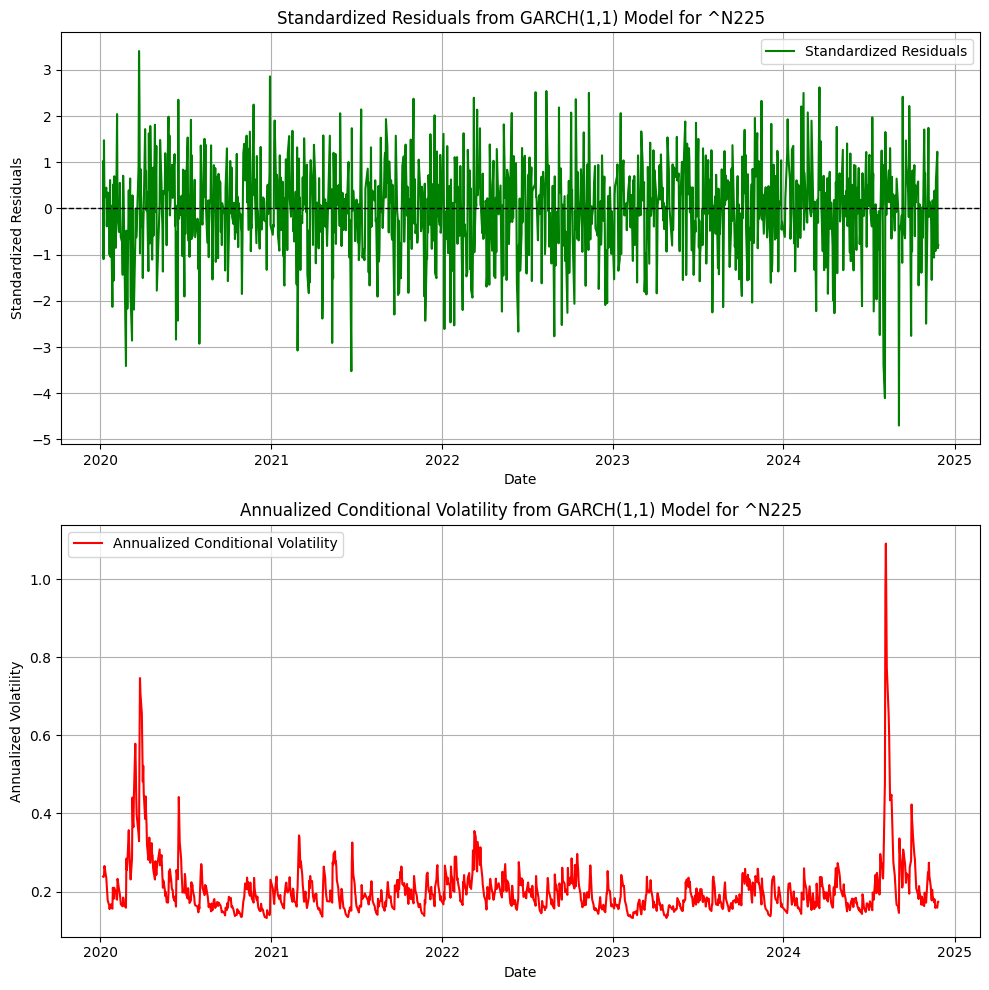

Word document 'GARCH_Model_Summary_N225.docx' has been created and plots displayed.


In [15]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from arch import arch_model
from docx import Document
import matplotlib.pyplot as plt
import numpy as np

# Download stock data
tickers = ['^N225']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Select returns for N225
returns = daily_returns['^N225']

# Create and fit GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')
garch_result = garch_model.fit(disp='off')

# Extract GARCH model summary as a table-like structure
summary = garch_result.summary().tables[1].data

# Create a Word document to store the GARCH model summary
doc = Document()
doc.add_heading('GARCH(1,1) Model Summary for ^N225', level=1)

# Add a table to the document
table = doc.add_table(rows=len(summary), cols=len(summary[0]))
table.style = 'Table Grid'

# Fill the table with data from the GARCH model summary
for i, row in enumerate(summary):
    for j, cell in enumerate(row):
        table.cell(i, j).text = cell

# Save the Word document
doc.save('GARCH_Model_Summary_N225.docx')

# Calculate the standardized residuals
standardized_residuals = garch_result.resid / garch_result.conditional_volatility

# Annualize the conditional volatility (multiply by sqrt(252) assuming 252 trading days per year)
annualized_volatility = garch_result.conditional_volatility * np.sqrt(252)

# Create subplots for Standardized Residuals and Annualized Conditional Volatility
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot Standardized Residuals
axes[0].plot(standardized_residuals, label='Standardized Residuals', color='green')
axes[0].set_title('Standardized Residuals from GARCH(1,1) Model for ^N225')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Standardized Residuals')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0].legend()
axes[0].grid(True)

# Plot Annualized Conditional Volatility
axes[1].plot(annualized_volatility, label='Annualized Conditional Volatility', color='red')
axes[1].set_title('Annualized Conditional Volatility from GARCH(1,1) Model for ^N225')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Annualized Volatility')
axes[1].legend()
axes[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()

# Print confirmation message
print("Word document 'GARCH_Model_Summary_N225.docx' has been created and plots displayed.")


GSPC

In [3]:
# Install required libraries
!pip install arch python-docx

# Import necessary libraries
import yfinance as yf
import pandas as pd
from arch import arch_model
from docx import Document

# Download stock data
tickers = ['^GSPC']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Select returns for GSPC
returns = daily_returns['^GSPC']

# Create and fit GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')
garch_result = garch_model.fit(disp='off')

# Extract GARCH model summary as a table-like structure
summary = garch_result.summary().tables[1].data

# Create a Word document
doc = Document()
doc.add_heading('GARCH(1,1) Model Summary for ^GSPC', level=1)

# Add a table to the document
table = doc.add_table(rows=len(summary), cols=len(summary[0]))
table.style = 'Table Grid'

# Fill the table with data from the GARCH model summary
for i, row in enumerate(summary):
    for j, cell in enumerate(row):
        table.cell(i, j).text = cell

# Save the Word document
doc.save('GARCH_Model_Summary_GSPC.docx')

print("Word document 'GARCH_Model_Summary_GSPC.docx' has been created.")


[*********************100%***********************]  1 of 1 completed

Word document 'GARCH_Model_Summary_GSPC.docx' has been created.



/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001824. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Visualization

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001824. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


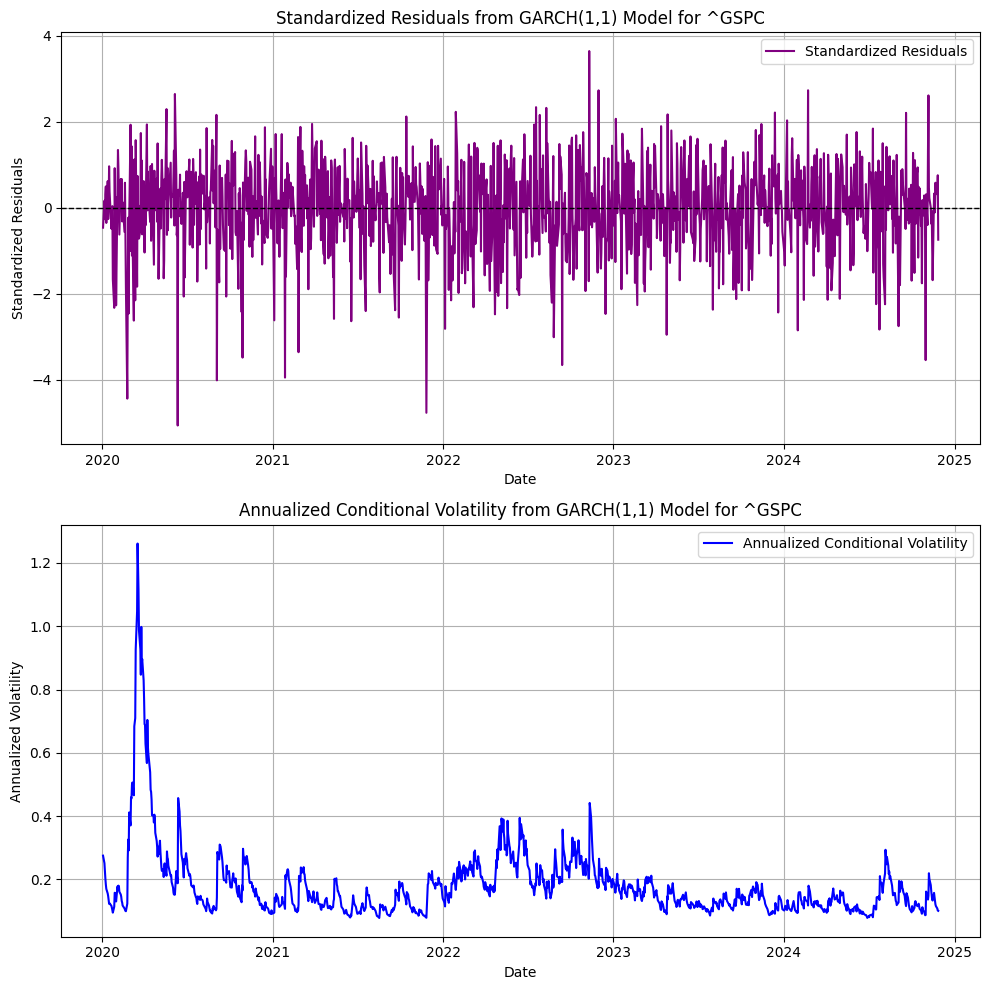

Word document 'GARCH_Model_Summary_GSPC.docx' has been created and plots displayed.


In [16]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from arch import arch_model
from docx import Document
import matplotlib.pyplot as plt
import numpy as np

# Download stock data
tickers = ['^GSPC']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Select returns for ^GSPC
returns = daily_returns['^GSPC']

# Create and fit GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')
garch_result = garch_model.fit(disp='off')

# Extract GARCH model summary as a table-like structure
summary = garch_result.summary().tables[1].data

# Create a Word document to store the GARCH model summary
doc = Document()
doc.add_heading('GARCH(1,1) Model Summary for ^N225', level=1)

# Add a table to the document
table = doc.add_table(rows=len(summary), cols=len(summary[0]))
table.style = 'Table Grid'

# Fill the table with data from the GARCH model summary
for i, row in enumerate(summary):
    for j, cell in enumerate(row):
        table.cell(i, j).text = cell

# Save the Word document
doc.save('GARCH_Model_Summary_GSPC.docx')

# Calculate the standardized residuals
standardized_residuals = garch_result.resid / garch_result.conditional_volatility

# Annualize the conditional volatility (multiply by sqrt(252) assuming 252 trading days per year)
annualized_volatility = garch_result.conditional_volatility * np.sqrt(252)

# Create subplots for Standardized Residuals and Annualized Conditional Volatility
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot Standardized Residuals
axes[0].plot(standardized_residuals, label='Standardized Residuals', color='purple')
axes[0].set_title('Standardized Residuals from GARCH(1,1) Model for ^GSPC')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Standardized Residuals')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0].legend()
axes[0].grid(True)

# Plot Annualized Conditional Volatility
axes[1].plot(annualized_volatility, label='Annualized Conditional Volatility', color='blue')
axes[1].set_title('Annualized Conditional Volatility from GARCH(1,1) Model for ^GSPC')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Annualized Volatility')
axes[1].legend()
axes[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()

# Print confirmation message
print("Word document 'GARCH_Model_Summary_GSPC.docx' has been created and plots displayed.")


^FTSE

In [4]:
# Install required libraries
!pip install arch python-docx

# Import necessary libraries
import yfinance as yf
import pandas as pd
from arch import arch_model
from docx import Document

# Download stock data
tickers = ['^FTSE']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Select returns for FTSE
returns = daily_returns['^FTSE']

# Create and fit GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')
garch_result = garch_model.fit(disp='off')

# Extract GARCH model summary as a table-like structure
summary = garch_result.summary().tables[1].data

# Create a Word document
doc = Document()
doc.add_heading('GARCH(1,1) Model Summary for ^FTSE', level=1)

# Add a table to the document
table = doc.add_table(rows=len(summary), cols=len(summary[0]))
table.style = 'Table Grid'

# Fill the table with data from the GARCH model summary
for i, row in enumerate(summary):
    for j, cell in enumerate(row):
        table.cell(i, j).text = cell

# Save the Word document
doc.save('GARCH_Model_Summary_FTSE.docx')

print("Word document 'GARCH_Model_Summary_FTSE.docx' has been created.")


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001217. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Word document 'GARCH_Model_Summary_FTSE.docx' has been created.


Visualization

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001217. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


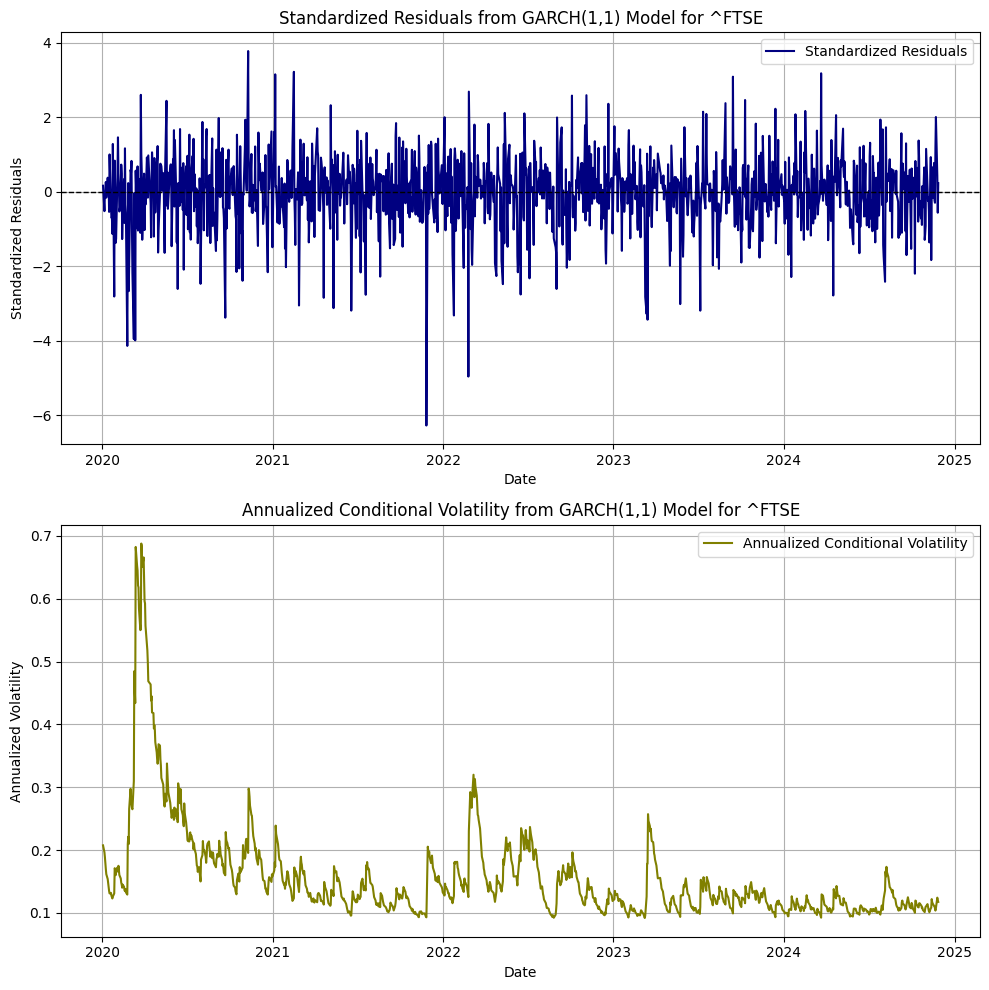

Word document 'GARCH_Model_Summary_FTSE.docx' has been created and plots displayed.


In [19]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from arch import arch_model
from docx import Document
import matplotlib.pyplot as plt
import numpy as np

# Download stock data
tickers = ['^FTSE']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Select returns for ^FTSE
returns = daily_returns['^FTSE']

# Create and fit GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')
garch_result = garch_model.fit(disp='off')

# Extract GARCH model summary as a table-like structure
summary = garch_result.summary().tables[1].data

# Create a Word document to store the GARCH model summary
doc = Document()
doc.add_heading('GARCH(1,1) Model Summary for ^FTSE', level=1)

# Add a table to the document
table = doc.add_table(rows=len(summary), cols=len(summary[0]))
table.style = 'Table Grid'

# Fill the table with data from the GARCH model summary
for i, row in enumerate(summary):
    for j, cell in enumerate(row):
        table.cell(i, j).text = cell

# Save the Word document
doc.save('GARCH_Model_Summary_FTSE.docx')

# Calculate the standardized residuals
standardized_residuals = garch_result.resid / garch_result.conditional_volatility

# Annualize the conditional volatility (multiply by sqrt(252) assuming 252 trading days per year)
annualized_volatility = garch_result.conditional_volatility * np.sqrt(252)

# Create subplots for Standardized Residuals and Annualized Conditional Volatility
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot Standardized Residuals
axes[0].plot(standardized_residuals, label='Standardized Residuals', color='navy')
axes[0].set_title('Standardized Residuals from GARCH(1,1) Model for ^FTSE')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Standardized Residuals')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0].legend()
axes[0].grid(True)

# Plot Annualized Conditional Volatility
axes[1].plot(annualized_volatility, label='Annualized Conditional Volatility', color='olive')
axes[1].set_title('Annualized Conditional Volatility from GARCH(1,1) Model for ^FTSE')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Annualized Volatility')
axes[1].legend()
axes[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()

# Print confirmation message
print("Word document 'GARCH_Model_Summary_FTSE.docx' has been created and plots displayed.")


FCHI

In [5]:
# Install required libraries
!pip install arch python-docx

# Import necessary libraries
import yfinance as yf
import pandas as pd
from arch import arch_model
from docx import Document

# Download stock data
tickers = ['^FCHI']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Select returns for FCHI
returns = daily_returns['^FCHI']

# Create and fit GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')
garch_result = garch_model.fit(disp='off')

# Extract GARCH model summary as a table-like structure
summary = garch_result.summary().tables[1].data

# Create a Word document
doc = Document()
doc.add_heading('GARCH(1,1) Model Summary for ^FCHI', level=1)

# Add a table to the document
table = doc.add_table(rows=len(summary), cols=len(summary[0]))
table.style = 'Table Grid'

# Fill the table with data from the GARCH model summary
for i, row in enumerate(summary):
    for j, cell in enumerate(row):
        table.cell(i, j).text = cell

# Save the Word document
doc.save('GARCH_Model_Summary_FCHI.docx')

print("Word document 'GARCH_Model_Summary_FCHI.docx' has been created.")


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001681. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Word document 'GARCH_Model_Summary_FCHI.docx' has been created.


Visualization

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001681. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


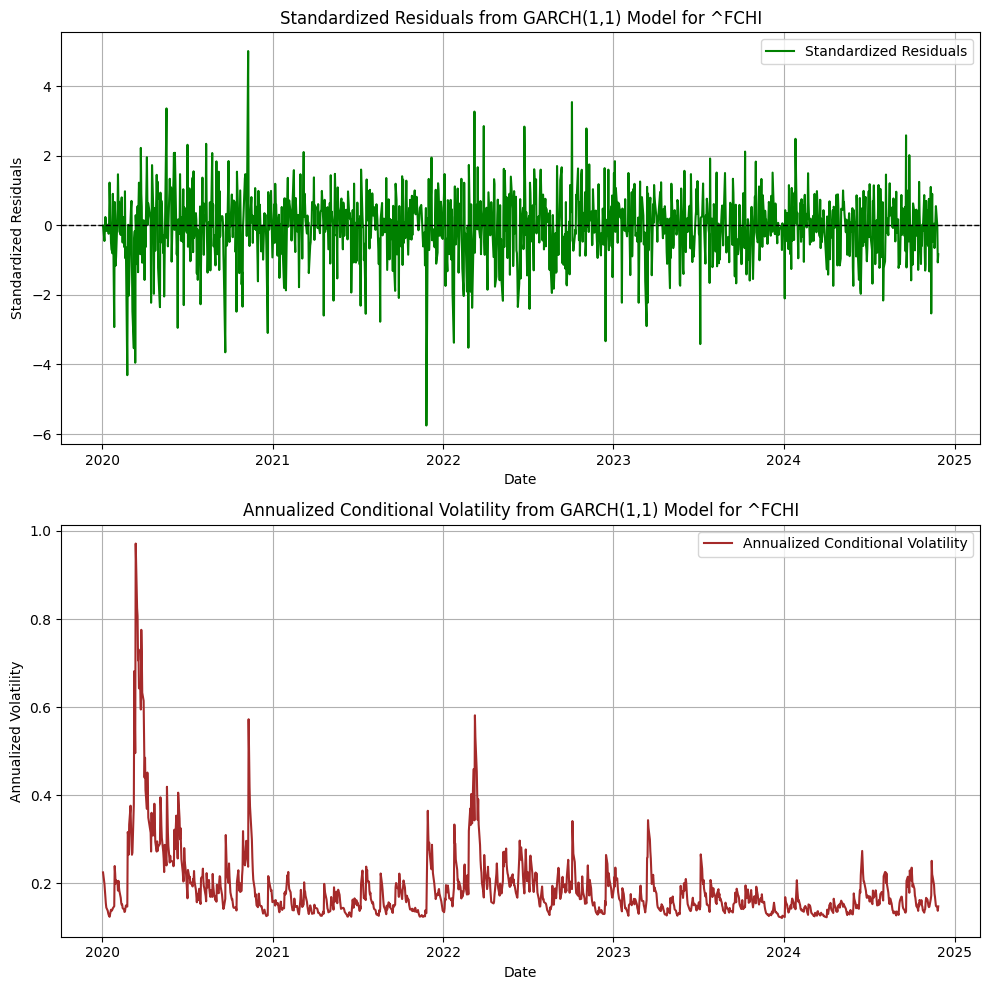

Word document 'GARCH_Model_Summary_FCHI.docx' has been created and plots displayed.


In [22]:
# Install required libraries
!pip install arch python-docx

# Import necessary libraries
import yfinance as yf
import pandas as pd
from arch import arch_model
from docx import Document
import matplotlib.pyplot as plt
import numpy as np

# Download stock data for ^FCHI (CAC 40 Index)
tickers = ['^FCHI']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Select returns for FCHI
returns = daily_returns['^FCHI']

# Create and fit GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')
garch_result = garch_model.fit(disp='off')

# Extract GARCH model summary as a table-like structure
summary = garch_result.summary().tables[1].data

# Create a Word document to store the GARCH model summary
doc = Document()
doc.add_heading('GARCH(1,1) Model Summary for ^FCHI', level=1)

# Add a table to the document
table = doc.add_table(rows=len(summary), cols=len(summary[0]))
table.style = 'Table Grid'

# Fill the table with data from the GARCH model summary
for i, row in enumerate(summary):
    for j, cell in enumerate(row):
        table.cell(i, j).text = cell

# Save the Word document
doc.save('GARCH_Model_Summary_FCHI.docx')

# Calculate the standardized residuals
standardized_residuals = garch_result.resid / garch_result.conditional_volatility

# Annualize the conditional volatility (multiply by sqrt(252) assuming 252 trading days per year)
annualized_volatility = garch_result.conditional_volatility * np.sqrt(252)

# Create subplots for Standardized Residuals and Annualized Conditional Volatility
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot Standardized Residuals
axes[0].plot(standardized_residuals, label='Standardized Residuals', color='green')
axes[0].set_title('Standardized Residuals from GARCH(1,1) Model for ^FCHI')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Standardized Residuals')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0].legend()
axes[0].grid(True)

# Plot Annualized Conditional Volatility
axes[1].plot(annualized_volatility, label='Annualized Conditional Volatility', color='brown')
axes[1].set_title('Annualized Conditional Volatility from GARCH(1,1) Model for ^FCHI')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Annualized Volatility')
axes[1].legend()
axes[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()

# Print confirmation message
print("Word document 'GARCH_Model_Summary_FCHI.docx' has been created and plots displayed.")


FTSEMIB.MI

In [6]:
# Install required libraries
!pip install arch python-docx yfinance

# Import necessary libraries
import yfinance as yf
import pandas as pd
from arch import arch_model
from docx import Document

# Download stock data
tickers = ['FTSEMIB.MI']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Select returns for FTSEMIB.MI
returns = daily_returns['FTSEMIB.MI']

# Create and fit GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')
garch_result = garch_model.fit(disp='off')

# Extract GARCH model summary as a table-like structure
summary = garch_result.summary().tables[1].data

# Create a Word document
doc = Document()
doc.add_heading('GARCH(1,1) Model Summary for FTSEMIB.MI', level=1)

# Add a table to the document
table = doc.add_table(rows=len(summary), cols=len(summary[0]))
table.style = 'Table Grid'

# Fill the table with data from the GARCH model summary
for i, row in enumerate(summary):
    for j, cell in enumerate(row):
        table.cell(i, j).text = cell

# Save the Word document
doc.save('GARCH_Model_Summary_FTSEMIB_MI.docx')

print("Word document 'GARCH_Model_Summary_FTSEMIB_MI.docx' has been created.")


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002018. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Word document 'GARCH_Model_Summary_FTSEMIB_MI.docx' has been created.


VISUALIZATION

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002018. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


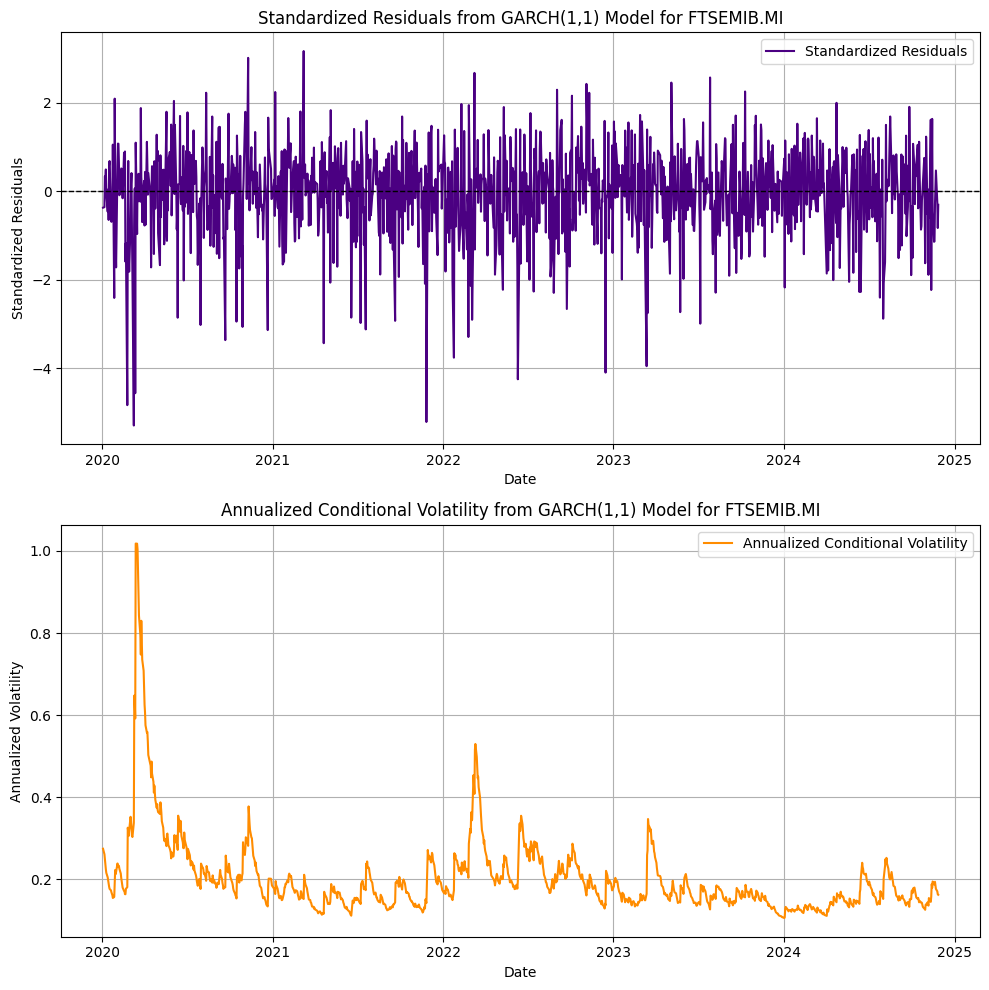

Word document 'GARCH_Model_Summary_FTSEMIB_MI.docx' has been created and plots displayed.


In [23]:
# Install required libraries
!pip install arch python-docx yfinance

# Import necessary libraries
import yfinance as yf
import pandas as pd
from arch import arch_model
from docx import Document
import matplotlib.pyplot as plt
import numpy as np

# Download stock data for FTSEMIB.MI (FTSE MIB Index)
tickers = ['FTSEMIB.MI']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Select returns for FTSEMIB.MI
returns = daily_returns['FTSEMIB.MI']

# Create and fit GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')
garch_result = garch_model.fit(disp='off')

# Extract GARCH model summary as a table-like structure
summary = garch_result.summary().tables[1].data

# Create a Word document to store the GARCH model summary
doc = Document()
doc.add_heading('GARCH(1,1) Model Summary for FTSEMIB.MI', level=1)

# Add a table to the document
table = doc.add_table(rows=len(summary), cols=len(summary[0]))
table.style = 'Table Grid'

# Fill the table with data from the GARCH model summary
for i, row in enumerate(summary):
    for j, cell in enumerate(row):
        table.cell(i, j).text = cell

# Save the Word document
doc.save('GARCH_Model_Summary_FTSEMIB_MI.docx')

# Calculate the standardized residuals
standardized_residuals = garch_result.resid / garch_result.conditional_volatility

# Annualize the conditional volatility (multiply by sqrt(252) assuming 252 trading days per year)
annualized_volatility = garch_result.conditional_volatility * np.sqrt(252)

# Create subplots for Standardized Residuals and Annualized Conditional Volatility
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot Standardized Residuals
axes[0].plot(standardized_residuals, label='Standardized Residuals', color='indigo')
axes[0].set_title('Standardized Residuals from GARCH(1,1) Model for FTSEMIB.MI')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Standardized Residuals')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0].legend()
axes[0].grid(True)

# Plot Annualized Conditional Volatility
axes[1].plot(annualized_volatility, label='Annualized Conditional Volatility', color='darkorange')
axes[1].set_title('Annualized Conditional Volatility from GARCH(1,1) Model for FTSEMIB.MI')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Annualized Volatility')
axes[1].legend()
axes[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()

# Print confirmation message
print("Word document 'GARCH_Model_Summary_FTSEMIB_MI.docx' has been created and plots displayed.")


^GSPTSE

In [7]:
# Install required libraries
!pip install arch python-docx yfinance

# Import necessary libraries
import yfinance as yf
import pandas as pd
from arch import arch_model
from docx import Document

# Download stock data
tickers = ['^GSPTSE']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Select returns for FTSEMIB.MI
returns = daily_returns['^GSPTSE']

# Create and fit GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')
garch_result = garch_model.fit(disp='off')

# Extract GARCH model summary as a table-like structure
summary = garch_result.summary().tables[1].data

# Create a Word document
doc = Document()
doc.add_heading('GARCH(1,1) Model Summary for ^GSPTSE', level=1)

# Add a table to the document
table = doc.add_table(rows=len(summary), cols=len(summary[0]))
table.style = 'Table Grid'

# Fill the table with data from the GARCH model summary
for i, row in enumerate(summary):
    for j, cell in enumerate(row):
        table.cell(i, j).text = cell

# Save the Word document
doc.save('GARCH_Model_Summary__GSPTSE.docx')

print("Word document 'GARCH_Model_Summary_GSPTSE.docx' has been created.")


[*********************100%***********************]  1 of 1 completed

Word document 'GARCH_Model_Summary_GSPTSE.docx' has been created.



/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001366. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Visualization

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001366. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


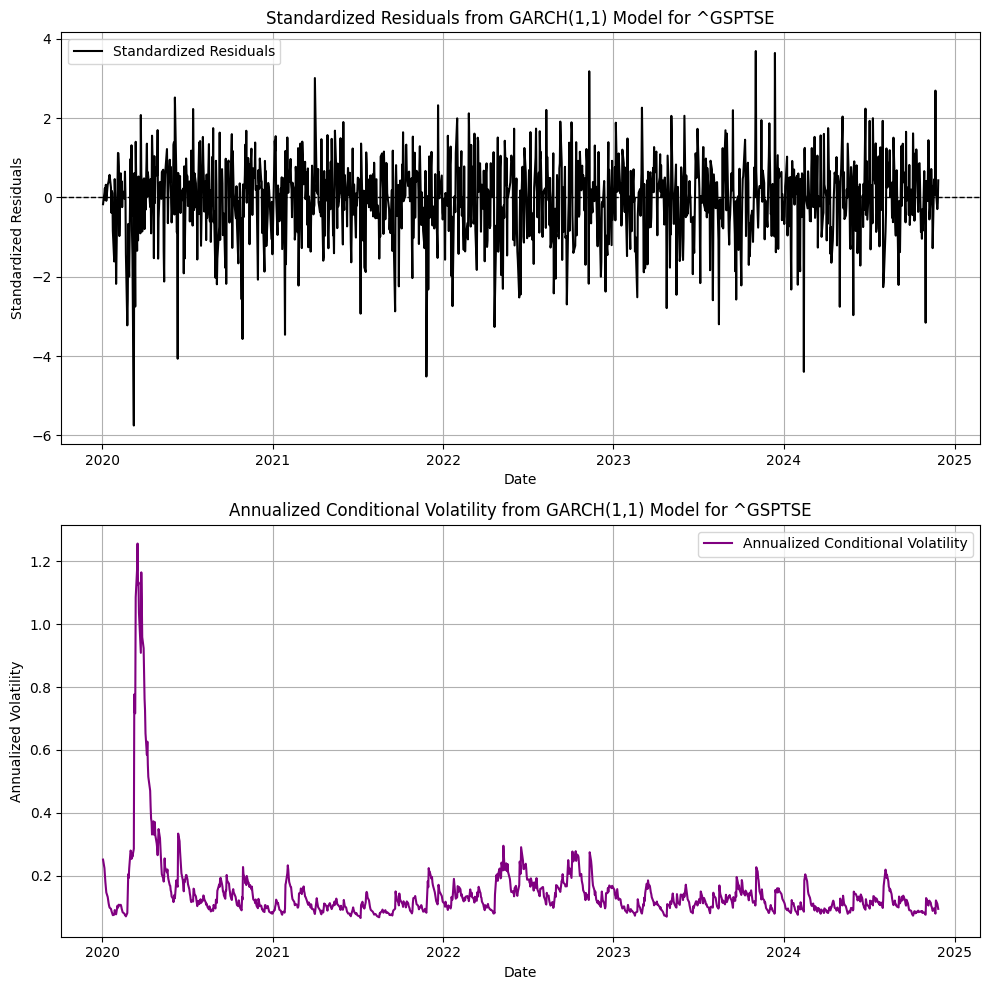

Word document 'GARCH_Model_Summary_GSPTSE.docx' has been created and plots displayed.


In [26]:
# Install required libraries
!pip install arch python-docx yfinance

# Import necessary libraries
import yfinance as yf
import pandas as pd
from arch import arch_model
from docx import Document
import matplotlib.pyplot as plt
import numpy as np

# Download stock data for ^GSPTSE (S&P/TSX Composite Index)
tickers = ['^GSPTSE']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Select returns for ^GSPTSE
returns = daily_returns['^GSPTSE']

# Create and fit GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')
garch_result = garch_model.fit(disp='off')

# Extract GARCH model summary as a table-like structure
summary = garch_result.summary().tables[1].data

# Create a Word document to store the GARCH model summary
doc = Document()
doc.add_heading('GARCH(1,1) Model Summary for ^GSPTSE', level=1)

# Add a table to the document
table = doc.add_table(rows=len(summary), cols=len(summary[0]))
table.style = 'Table Grid'

# Fill the table with data from the GARCH model summary
for i, row in enumerate(summary):
    for j, cell in enumerate(row):
        table.cell(i, j).text = cell

# Save the Word document
doc.save('GARCH_Model_Summary_GSPTSE.docx')

# Calculate the standardized residuals
standardized_residuals = garch_result.resid / garch_result.conditional_volatility

# Annualize the conditional volatility (multiply by sqrt(252) assuming 252 trading days per year)
annualized_volatility = garch_result.conditional_volatility * np.sqrt(252)

# Create subplots for Standardized Residuals and Annualized Conditional Volatility
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot Standardized Residuals
axes[0].plot(standardized_residuals, label='Standardized Residuals', color='black')
axes[0].set_title('Standardized Residuals from GARCH(1,1) Model for ^GSPTSE')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Standardized Residuals')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0].legend()
axes[0].grid(True)

# Plot Annualized Conditional Volatility
axes[1].plot(annualized_volatility, label='Annualized Conditional Volatility', color='purple')
axes[1].set_title('Annualized Conditional Volatility from GARCH(1,1) Model for ^GSPTSE')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Annualized Volatility')
axes[1].legend()
axes[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()

# Print confirmation message
print("Word document 'GARCH_Model_Summary_GSPTSE.docx' has been created and plots displayed.")


^GDAXI

In [8]:
# Install required libraries
!pip install arch python-docx yfinance

# Import necessary libraries
import yfinance as yf
import pandas as pd
from arch import arch_model
from docx import Document

# Download stock data
tickers = ['^GDAXI']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Select returns for FTSEMIB.MI
returns = daily_returns['^GDAXI']

# Create and fit GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')
garch_result = garch_model.fit(disp='off')

# Extract GARCH model summary as a table-like structure
summary = garch_result.summary().tables[1].data

# Create a Word document
doc = Document()
doc.add_heading('GARCH(1,1) Model Summary for ^GDAXI', level=1)

# Add a table to the document
table = doc.add_table(rows=len(summary), cols=len(summary[0]))
table.style = 'Table Grid'

# Fill the table with data from the GARCH model summary
for i, row in enumerate(summary):
    for j, cell in enumerate(row):
        table.cell(i, j).text = cell

# Save the Word document
doc.save('GARCH_Model_Summary__GDAXI.docx')

print("Word document 'GARCH_Model_Summary_GDAXI.docx' has been created.")


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000172. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Word document 'GARCH_Model_Summary_GDAXI.docx' has been created.


Visualization

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000172. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


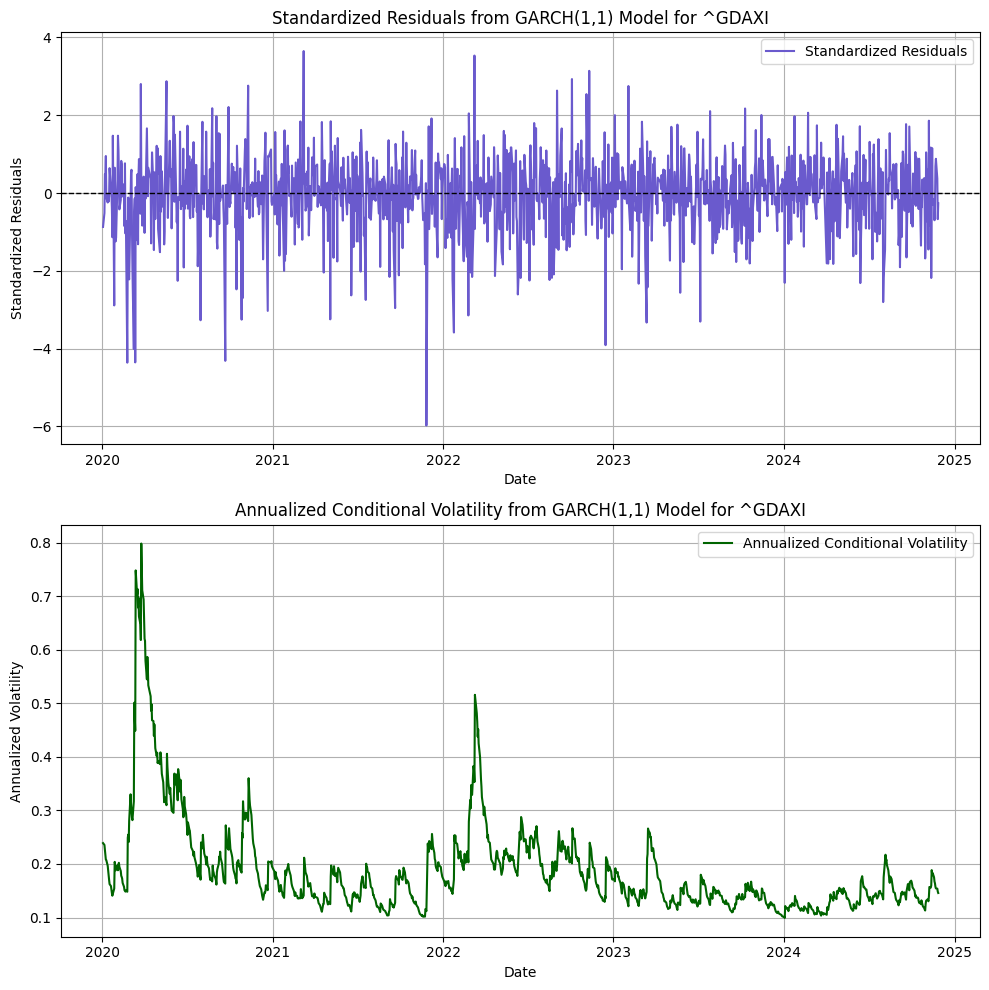

Word document 'GARCH_Model_Summary_GDAXI.docx' has been created and plots displayed.


In [27]:
# Install required libraries
!pip install arch python-docx yfinance

# Import necessary libraries
import yfinance as yf
import pandas as pd
from arch import arch_model
from docx import Document
import matplotlib.pyplot as plt
import numpy as np

# Download stock data for ^GDAXI (DAX Index)
tickers = ['^GDAXI']
data = yf.download(tickers, start='2020-01-01', end='2024-11-28')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Select returns for ^GDAXI
returns = daily_returns['^GDAXI']

# Create and fit GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')
garch_result = garch_model.fit(disp='off')

# Extract GARCH model summary as a table-like structure
summary = garch_result.summary().tables[1].data

# Create a Word document to store the GARCH model summary
doc = Document()
doc.add_heading('GARCH(1,1) Model Summary for ^GDAXI', level=1)

# Add a table to the document
table = doc.add_table(rows=len(summary), cols=len(summary[0]))
table.style = 'Table Grid'

# Fill the table with data from the GARCH model summary
for i, row in enumerate(summary):
    for j, cell in enumerate(row):
        table.cell(i, j).text = cell

# Save the Word document
doc.save('GARCH_Model_Summary_GDAXI.docx')

# Calculate the standardized residuals
standardized_residuals = garch_result.resid / garch_result.conditional_volatility

# Annualize the conditional volatility (multiply by sqrt(252) assuming 252 trading days per year)
annualized_volatility = garch_result.conditional_volatility * np.sqrt(252)

# Create subplots for Standardized Residuals and Annualized Conditional Volatility
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot Standardized Residuals
axes[0].plot(standardized_residuals, label='Standardized Residuals', color='slateblue')
axes[0].set_title('Standardized Residuals from GARCH(1,1) Model for ^GDAXI')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Standardized Residuals')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0].legend()
axes[0].grid(True)

# Plot Annualized Conditional Volatility
axes[1].plot(annualized_volatility, label='Annualized Conditional Volatility', color='darkgreen')
axes[1].set_title('Annualized Conditional Volatility from GARCH(1,1) Model for ^GDAXI')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Annualized Volatility')
axes[1].legend()
axes[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()

# Print confirmation message
print("Word document 'GARCH_Model_Summary_GDAXI.docx' has been created and plots displayed.")


**Cointegration Tests**

*Johansen Test*

[*********************100%***********************]  7 of 7 completed


Missing values in data:
Ticker
FTSEMIB.MI    10
^FCHI          8
^FTSE         14
^GDAXI         8
^GSPC         18
^GSPTSE       17
^N225         29
dtype: int64
Johansen Cointegration Test Results:
Trace Statistic: [136.42176021  89.68822932  58.91203908  36.42453103  21.00169905
   6.97443456   0.21511289]
Critical Values (5%): [125.6185  95.7542  69.8189  47.8545  29.7961  15.4943   3.8415]
Eigenvalues: [0.10164233 0.06815389 0.05026934 0.03475514 0.03166059 0.01538348
 0.00049326]


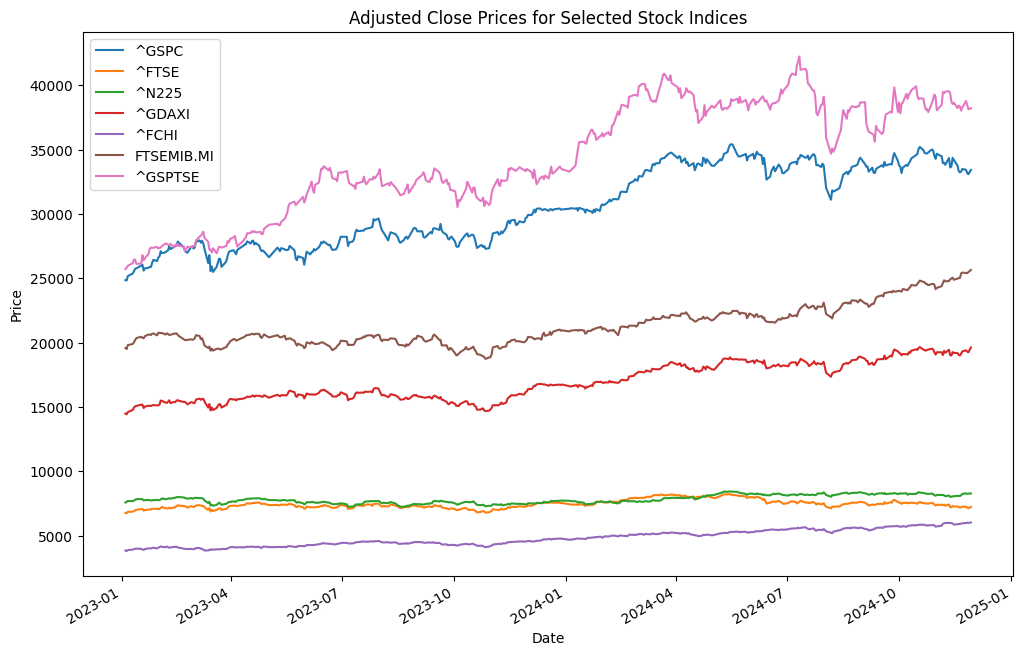

In [30]:
# Install necessary libraries
!pip install yfinance statsmodels matplotlib

# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Define index tickers
tickers = ['^GSPC', '^FTSE', '^N225', '^GDAXI', '^FCHI', 'FTSEMIB.MI', '^GSPTSE']

# Fetch data
data = yf.download(tickers, start='2023-01-01', end='2024-11-30')['Adj Close']

# Check for missing values in the dataset
print("Missing values in data:")
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Scale the data (optional but can help with convergence)
data_scaled = (data - data.mean()) / data.std()

# Perform Johansen cointegration test
# You can experiment with different lag values here (e.g., 1, 5, etc.)
johansen_test = coint_johansen(data_scaled, det_order=0, k_ar_diff=1)

# Output Johansen cointegration test results
print("Johansen Cointegration Test Results:")
print("Trace Statistic:", johansen_test.lr1)  # Trace statistics
print("Critical Values (5%):", johansen_test.cvt[:, 1])  # Critical values at 5%
print("Eigenvalues:", johansen_test.eig)  # Eigenvalues

# Visualize the data (just for context)
data.plot(figsize=(12, 8))
plt.title('Adjusted Close Prices for Selected Stock Indices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(tickers)
plt.show()


*Engle-Granger Test*

[*********************100%***********************]  7 of 7 completed


ADF Statistic: -1.9850049569020736
p-value: 0.2931863576666913
Critical Values: {'1%': -3.4454725477848998, '5%': -2.8682072297316794, '10%': -2.570321396485665}


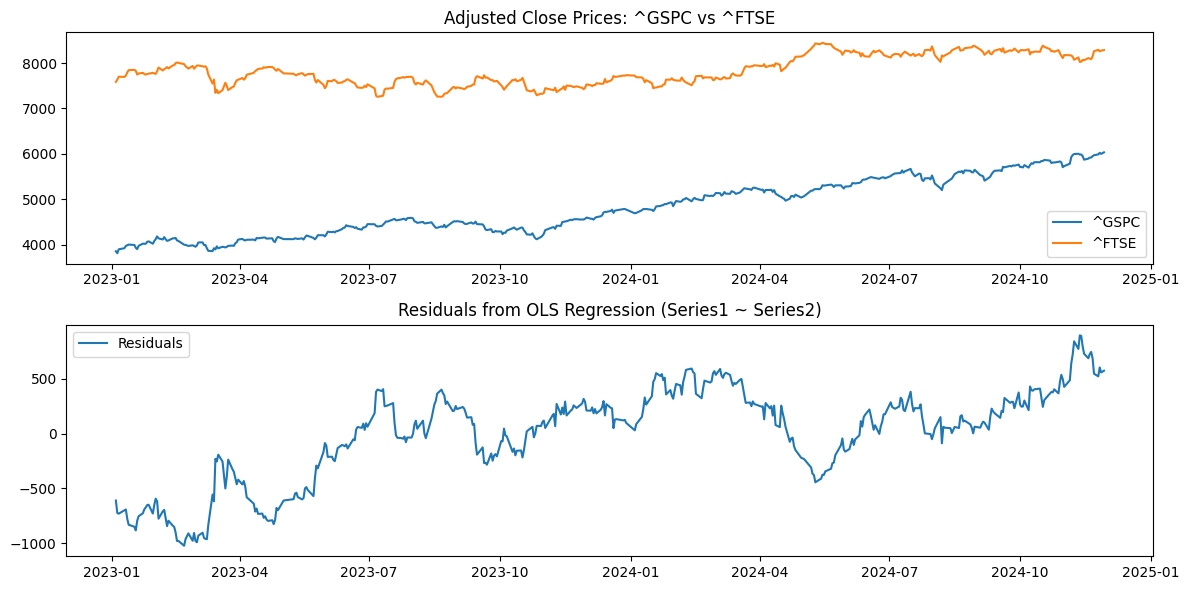

In [32]:
# Install necessary libraries
!pip install yfinance statsmodels matplotlib

# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm  # Corrected import for OLS
from statsmodels.regression.linear_model import OLS  # Corrected import for OLS

# Define index tickers
tickers = ['^GSPC', '^FTSE', '^N225', '^GDAXI', '^FCHI', 'FTSEMIB.MI', '^GSPTSE']

# Fetch data
data = yf.download(tickers, start='2023-01-01', end='2024-11-30')['Adj Close']

# Drop missing values (optional)
data = data.dropna()

# Select two time series to test for cointegration (e.g., '^GSPC' and '^FTSE')
series1 = data['^GSPC']
series2 = data['^FTSE']

# Step 1: Perform OLS regression
# Estimate the long-run relationship between the two time series (dependent: series1, independent: series2)
X = sm.add_constant(series2)  # Add constant term to the independent variable
model = sm.OLS(series1, X)  # Perform OLS regression
result = model.fit()

# Get the residuals from the regression
residuals = result.resid

# Step 2: Perform the Augmented Dickey-Fuller (ADF) test on the residuals
adf_result = adfuller(residuals)

# Output the results
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'Critical Values: {adf_result[4]}')

# If the p-value is less than 0.05, we can reject the null hypothesis and conclude that the series are cointegrated.

# Plot the original time series and the residuals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(series1, label='^GSPC')
plt.plot(series2, label='^FTSE')
plt.title('Adjusted Close Prices: ^GSPC vs ^FTSE')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(residuals, label='Residuals')
plt.title('Residuals from OLS Regression (Series1 ~ Series2)')
plt.legend()

plt.tight_layout()
plt.show()



**Time Series Plot**

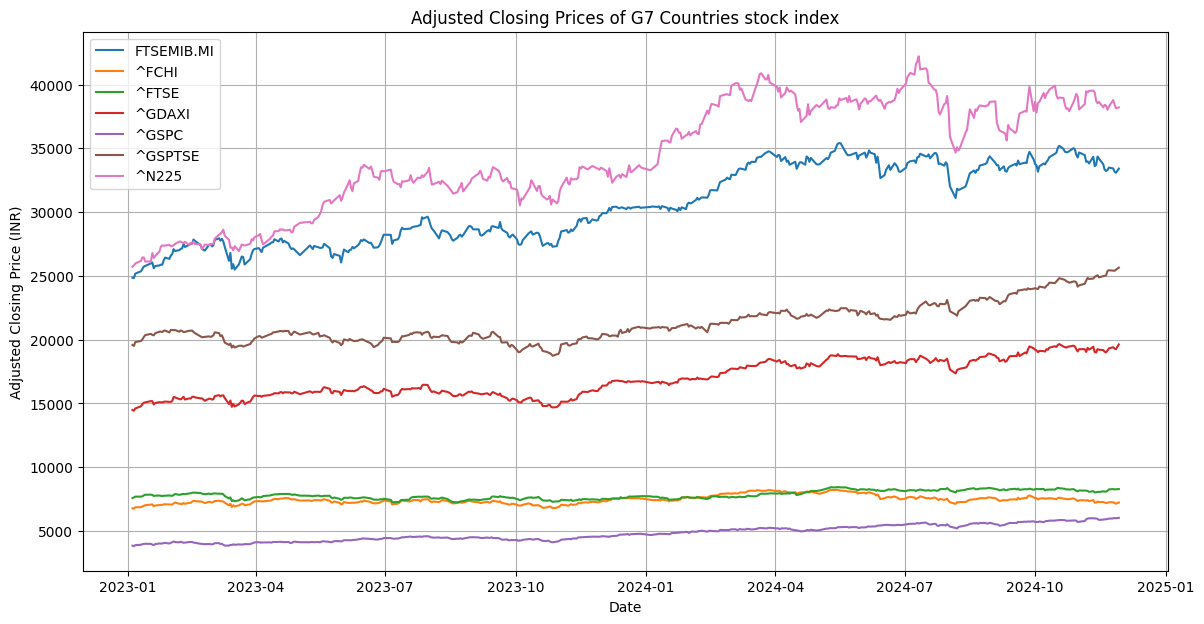

In [34]:
# Plot time series data
plt.figure(figsize=(14, 7))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)
plt.title('Adjusted Closing Prices of G7 Countries stock index')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.show()
